### Pie Charts

Pie charts present data in a circular graph that is divided into slices according to the categories being analised. 

To create our pie chart, first we need to have our dataset organised, this has been covered in more detail in sections "Course Visualising Data with Python MOD1 and MOD2". Let's do a quick version of it here:

In [1]:
import numpy as np
import pandas as pd
df_can=pd.read_excel('~/Documents/Cambridge/Python-Lessons/Canada.xlsx',
                    sheet_name='Canada by Citizenship',
                    skiprows=range(20),
                    skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [2]:
#cleaning dataset, by deleting some columns and updating the dataset
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

#renaming some columns and update dataset
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

#changing column names to string type
df_can.columns=list(map(str,df_can.columns))

#set index as column and update dataset
df_can.set_index('Country',inplace=True)

#create a column with total
df_can['Total']=df_can.sum(axis=1)

#create list with year numbers
years=list(map(str,range(1980,2014)))

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Now that the dataset is clean and organised, we can start using it for plotting:

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [4]:
#use method 'groupby()' to select data based on a criteria, then subject it to a transformation (a transformation is necesary)

#select the rows called 'Continents', and sum them up according to the different categories inside 'Continents'
df_continents=df_can.groupby('Continent',axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


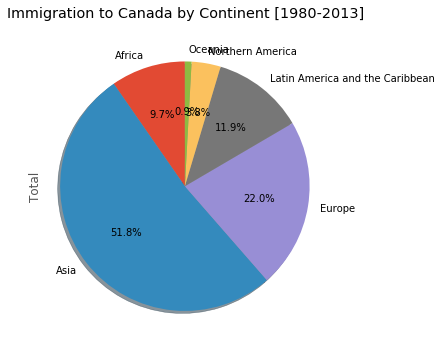

In [5]:
df_continents['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%', #places label inside wedges and in percentages format
                           startangle=90, #starts the pie chart at 90 degrees
                           shadow=True, #gives it a 3D effect
                           )
plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal') #sets axis to be a circle

plt.show()

As you can see, some of the writing are very difficult to read, let's try to fix this:

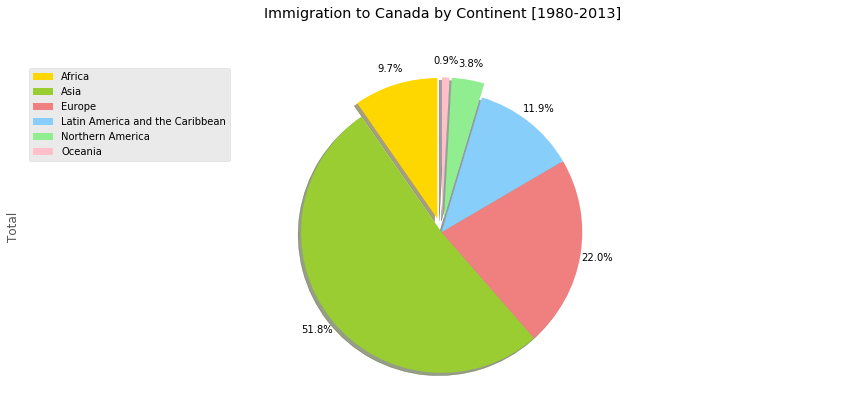

In [6]:
colors_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']

#small wedges in the pie chart are difficult to see, so we will make them come out slightly from the chart
explode_list=[0.1,0,0,0,0.1,0.1] #starts counting at the first item of the 'Continent' column, so Africa

df_continents['Total'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None, #remove labels on the pie chart. We will add them as legends
                           pctdistance=1.12, #distance from the pie chart to the text generated by autopct (in ratios)
                           colors=colors_list,
                           explode=explode_list
                           )

plt.title('Immigration to Canada by Continent [1980-2013]',y=1.12) #scale the title up by 12% to match pctdistance

plt.axis('equal')

plt.legend(labels=df_continents.index,loc='upper left') #create legend based on index, and specify where it appears on the plot

plt.show()

### Box Plots

Box plots are a way to represent data that shows the distribution of the data. It displays a number of features of the data:

- Minimum value
- First quartile: middle number between the minumum and the median
- Second quartile: median (middle number of sorted dataset)
- Third quartile: middle number between median and maximum
- Maximum value
- Inter Quartile Range: values between the first and the third quartile



In [7]:
#gathering data into a data frame
df_japan=df_can.loc[['Japan'],years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


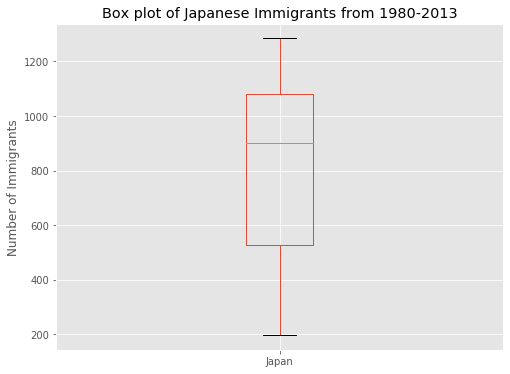

In [8]:
#making a box plot
df_japan.plot(kind='box',figsize=(8,6))

plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

In order to see a summary of the data that we plotted, we can use `.describe()`:

In [9]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Some aesthetic changes to do with box plots:

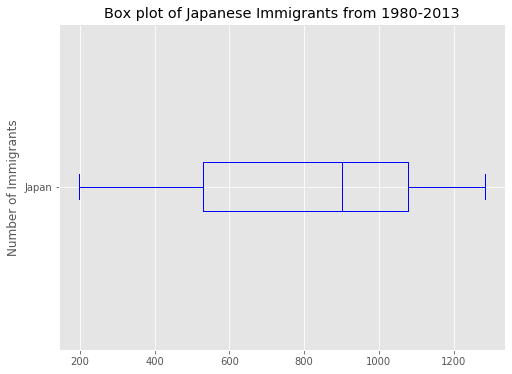

In [10]:
#making box on horizontal axis, and changing colour
df_japan.plot(kind='box',figsize=(8,6),color='blue',vert=False)

plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

#### Subplots

Sometimes we want to put many plots together in a figure, and we can do that we python. But we need to use the *artist layer* instead of the *scripting layer* for this. The typical syntax requires us to create a canvas using `plt.figure()` and then add subplots to this canvas with `fig.add_subplot(nrows,ncols,plot_number)`. The `nrows` and `ncols` will define how many subfigures the canvas is split into. The `plot_number` indentifies the subplot; it starts at 1 ad increments along the rows.

Let's try an example:

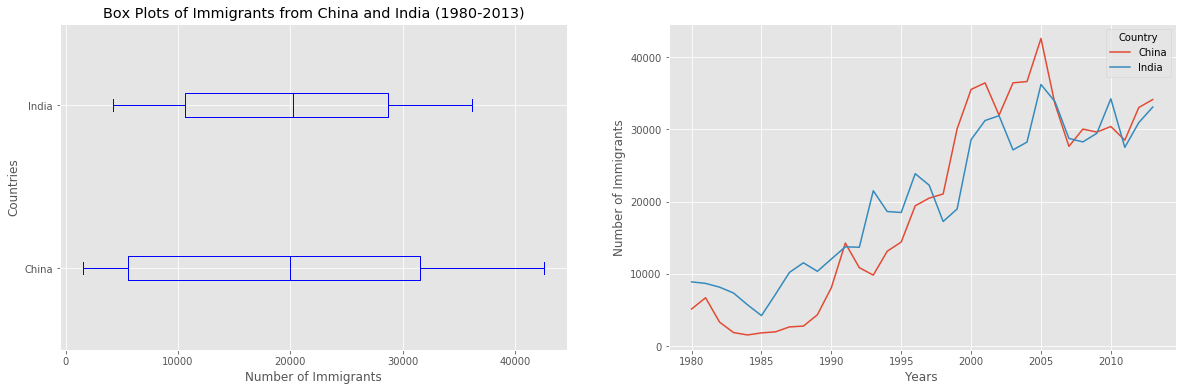

In [15]:
df_CI=df_can.loc[['China','India'],years].transpose()

#create canvas
fig=plt.figure()

#create subplot 1
ax0=fig.add_subplot(1,2,1)

#create subplot 2
ax1=fig.add_subplot(1,2,2)

#insert graph into subplot 1; ax will define the position
df_CI.plot(kind='box',color='blue',vert=False,figsize=(20,6),ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980-2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

#insert graph into subplot 2
df_CI.plot(kind='line',figsize=(20,6),ax=ax1)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Immigrants')


plt.show()

Note: there is another way to define the coordinates and name of the subplot (but this method is only possible when the number of subplots is below 10: `subplot(122) == subplot(1,2,2)`. This means that our canvas will have 1 row, split into 2 columns, and this graph will go into the position 2.

Outliers of the data are plotted in box plots if they meet the following requirements:

- larger than the third quartile by at least 1.5 times the Inter Quartile Range
- smaller than the first quartile by at least 1.5 times the Inter Quartile Range

### Scatter Plots

This type of graph is useful to compare variables together and investigate trends. Commonly, further analysis are carried out using tools like regression analysis where we can mathematically calculate relationships.

Let's plot the total immigration to Canada:

In [16]:
#add the total immigration per year and place it in a column. so will make a data frame of two columns
df_tot=pd.DataFrame(df_can[years].sum(axis=0))

#change the data type of years to integers
df_tot.index=map(int,df_tot.index)

#transform the index which was countries back to a numbered index
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns=['year','total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


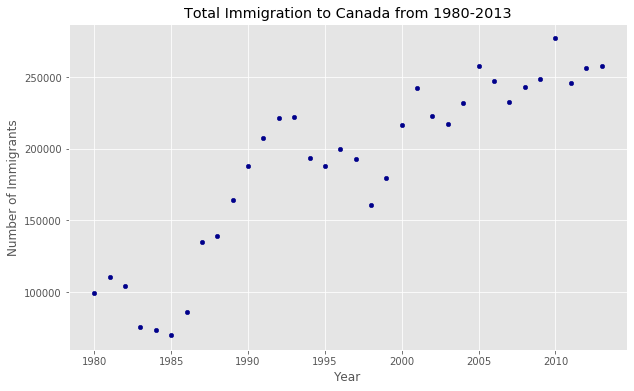

In [17]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='darkblue')
plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In order to calculate the line of best fit we can use `polyfit`:

In [18]:
x=df_tot['year']
y=df_tot['total']
fit=np.polyfit(x,y,deg=1) #deg refers to degree of fitting polynomial; 1= linear, 2= quadratic, etc.

fit

array([ 5.56709228e+03, -1.09261952e+07])

This output has a value in position 0 referring to the slope of the line of best fit, and the value in postion 1 referring to the intercept of this line.

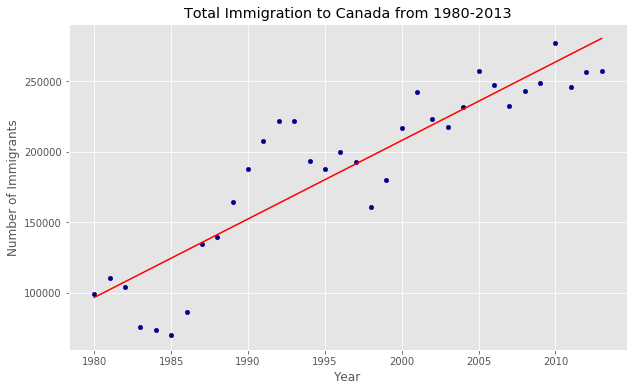

In [19]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='darkblue')
plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x,fit[0]*x + fit[1],color='red')

plt.show()

### Bubble Plots

These graphs are quite similar to scatter plots, but they represent data in three dimensions. The datapoints which previously were displayed as dots, here are bubbles, where the sizes vary according to the third dimensional variable, also known as the weight.

To do an example, let's first prepare the data:

In [22]:
#trabsfer years to rows
df_can_t=df_can[years].transpose()

#make index integers data type
df_can_t.index=map(int,df_can_t.index)

#give the new column with years a name
df_can_t.index.name='Year'

#make the first column the index
df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


To create the weights for the data, we need to normalise the data first. The normalisation of the data can be done in numerous ways, but here we will try one called *feature scaling*. This brings all values to a range of 0 to 1.

Equation for *feature scaling*:

$$ X' = \frac{X-X_{min}}{X_{max}-X_{min}}$$


where `X` refers to the originial value, and `X'` is the normalised value. Once the values are passed through this formula, they will be scaled to a number between 0 and 1. 

Normalisation:

In [23]:
#normalisation for China
norm_china= (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

#normalisation for India
norm_india= (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


To be able to add data for two countries to the same axes, here we will define an axes for one dataset, and then use that same for the next dataset.

Note that we will also modify the values generated with the normalisation for the weights. Values between 0 and 1 as computed will not show on the graph, so we will scale this up by multiplying the values by 2000, and adding 10 to make sure that the min value will not stay at 0.

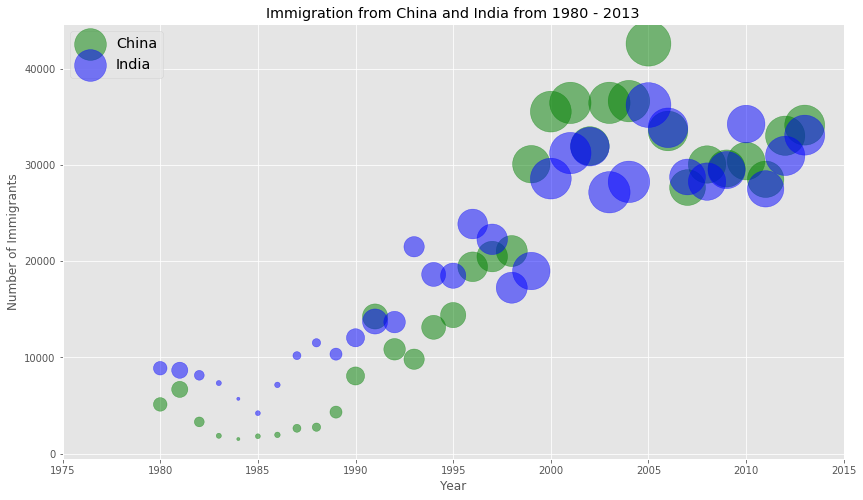

In [24]:
#China
ax0=df_can_t.plot(kind='scatter',
                 x='Year',
                 y='China',
                 figsize=(14,8),
                 alpha=0.5, #transparency of bubbles
                 color='green',
                 s=norm_china*2000 + 10, #weights
                  xlim=(1975,2015)
                 )

#India
ax1=df_can_t.plot(kind='scatter',
                 x='Year',
                 y='India',
                 figsize=(14,8),
                 alpha=0.5, #transparency of bubbles
                 color='blue',
                 s=norm_china*2000 + 10, #weights
                  ax=ax0
                 )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China','India'],loc='upper left', fontsize='x-large')